<a href="https://colab.research.google.com/github/HritikaGupta22/WEB_SCRAPPINGPROJECT_045020/blob/main/WEB_SCRAPPING(045020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJECTIVES :**
1.	To collect men's T20 cricket statistics from a ESPNCRICINFO(Men’s t20 data ) source.
2. Perform some statistical operation on whole data
3.	To identify the top 8 countries based on the total runs scored by players from each country.
4.	To compare players from the top 8 countries based on specific performance metrics.
5.	To analyze Indian players' statistics and identify key insights.
6.	To calculate correlations and p-values to understand relationships within the data of Indian players.


**GENERAL DESCRIPTIONS OF DATA**
**Data Sources :**
I scrap the data from Website : “EspnCricinfo”  url :  https://www.espncricinfo.com/records/most-runs-in-career-282827.
The data consist of T20 batting records for T20I matches which data of  many players from different countries.


**Scrapping the data from the website**

IMPORTING THE REQUIRED MODULES

In [62]:
#importing required library
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [63]:
# Define the URL of the website from which you want to extract data
url = "https://www.espncricinfo.com/records/most-runs-in-career-282827"

# Use the requests library to make an HTTP GET request to the specified URL and retrieve the page's HTML content
source = requests.get(url).text

# Create a BeautifulSoup object to parse the HTML content using the 'lxml' parser
soup = BeautifulSoup(source, 'lxml')

# print(soup.prettify())

In [64]:
#finding the table in the website
table=soup.find("table", class_="ds-w-full ds-table ds-table-xs ds-table-auto ds-w-full ds-overflow-scroll ds-scrollbar-hide")
print(table.prettify())

<table class="ds-w-full ds-table ds-table-xs ds-table-auto ds-w-full ds-overflow-scroll ds-scrollbar-hide">
 <thead class="ds-bg-fill-content-alternate ds-text-left">
  <tr class="">
   <td class="ds-min-w-max">
    <div class="ds-popper-wrapper">
     <span class="ds-cursor-pointer">
      Player
     </span>
    </div>
   </td>
   <td class="ds-min-w-max ds-text-right">
    <div class="ds-popper-wrapper">
     <span class="ds-cursor-pointer">
      Span
     </span>
    </div>
   </td>
   <td class="ds-min-w-max ds-text-right">
    <div class="ds-popper-wrapper">
     <span class="ds-cursor-pointer">
      Mat
     </span>
    </div>
   </td>
   <td class="ds-min-w-max ds-text-right">
    <div class="ds-popper-wrapper">
     <span class="ds-cursor-pointer">
      Inns
     </span>
    </div>
   </td>
   <td class="ds-min-w-max ds-text-right">
    <div class="ds-popper-wrapper">
     <span class="ds-cursor-pointer">
      NO
     </span>
    </div>
   </td>
   <td class="ds-min-w-max 

In [65]:
#to find table header
title=soup.find("thead",class_="ds-bg-fill-content-alternate ds-text-left")
#print(title)

In [66]:
#Getting the headers of the table
if title:
  header_row = title.find("tr")
  header = [th.text.strip() for th in header_row.find_all("td")]

In [67]:
# Find the 'tbody' (table body) element within the previously located 'table'
tbody = table.find("tbody")
data = []

if tbody:
    # Find all 'tr' (table row) elements within the 'tbody'
    rows = tbody.find_all("tr")

    # Loop through each 'tr' element to extract row data
    for row in rows:
        # Extract text from each 'td' (table data) element within the row and strip any leading/trailing whitespace
        row_data = [td.text.strip() for td in row.find_all("td")]

        # Append the extracted row data to the 'data' list
        data.append(row_data)

# Create a Pandas DataFrame using the extracted data and the previously defined 'header' (table header)
cricket_df = pd.DataFrame(data, columns=header)
# Print the resulting DataFrame
print(cricket_df)

                Player       Span  Mat Inns  NO  Runs    HS    Ave    BF  \
0        V Kohli (IND)  2010-2022  115  107  31  4008  122*  52.73  2905   
1      RG Sharma (IND)  2007-2022  148  140  17  3853   118  31.32  2767   
2      MJ Guptill (NZ)  2009-2022  122  118   7  3531   105  31.81  2602   
3     Babar Azam (PAK)  2016-2023  104   98  14  3485   122  41.48  2714   
4    PR Stirling (IRE)  2009-2023  131  130  11  3408  115*  28.63  2509   
..                 ...        ...  ...  ...  ..   ...   ...    ...   ...   
145   IA Karim (KENYA)  2013-2022   44   40  11   888   71*  30.62   876   
146      G Malla (NEP)  2014-2022   45   39   1   883   107  23.23   734   
147      RP Burl (ZIM)  2018-2023   58   53  19   882   57*  25.94   749   
148  K Motlhanka (BOT)  2019-2023   34   33   4   868   75*  29.93   763   
149  AP Rajeevan (TAN)  2022-2023   39   36   6   861    70  28.70   731   

         SR 100  50   0   4s   6s  
0    137.96   1  37   4  356  117  
1    139.24   4

In [68]:
#print the top 5 data of a table
print(cricket_df.head())

              Player       Span  Mat Inns  NO  Runs    HS    Ave    BF  \
0      V Kohli (IND)  2010-2022  115  107  31  4008  122*  52.73  2905   
1    RG Sharma (IND)  2007-2022  148  140  17  3853   118  31.32  2767   
2    MJ Guptill (NZ)  2009-2022  122  118   7  3531   105  31.81  2602   
3   Babar Azam (PAK)  2016-2023  104   98  14  3485   122  41.48  2714   
4  PR Stirling (IRE)  2009-2023  131  130  11  3408  115*  28.63  2509   

       SR 100  50   0   4s   6s  
0  137.96   1  37   4  356  117  
1  139.24   4  29  10  348  182  
2  135.70   2  20   3  309  173  
3  128.40   3  30   5  371   53  
4  135.83   1  23  13  394  123  


**Data Preprocessing steps**
1. seperating name and country
2. Replacing - with 0 where - representing 0
3. Removing *
4. Modifying the required columns data type
5. Extract the country code from the 'Country' column

In [69]:
# Separate name and country
cricket_df[['Player_Name', 'Country']] = cricket_df['Player'].str.split('(', expand=True)

# Remove the closing parenthesis from the 'Country' column
cricket_df['Country'] = cricket_df['Country'].str.rstrip(')')

# Reorder the columns while keeping all other columns in their original order
column_order = ['Player_Name', 'Country'] + [col for col in cricket_df.columns if col not in ['Player_Name', 'Country']]
cricket_df = cricket_df[column_order]

# Drop the original 'Player' column
cricket_df.drop(columns=['Player'], inplace=True)

# Print the updated DataFrame
cricket_df

<ipython-input-69-24bb70d7aab0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cricket_df.drop(columns=['Player'], inplace=True)


,Player_Name,Country,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli,IND,2010-2022,115,107,31,4008,122*,52.73,2905,137.96,1,37,4,356,117
1,RG Sharma,IND,2007-2022,148,140,17,3853,118,31.32,2767,139.24,4,29,10,348,182
2,MJ Guptill,NZ,2009-2022,122,118,7,3531,105,31.81,2602,135.70,2,20,3,309,173
3,Babar Azam,PAK,2016-2023,104,98,14,3485,122,41.48,2714,128.40,3,30,5,371,53
4,PR Stirling,IRE,2009-2023,131,130,11,3408,115*,28.63,2509,135.83,1,23,13,394,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,IA Karim,KENYA,2013-2022,44,40,11,888,71*,30.62,876,101.36,-,6,2,83,13
146,G Malla,NEP,2014-2022,45,39,1,883,107,23.23,734,120.29,1,2,1,76,36
147,RP Burl,ZIM,2018-2023,58,53,19,882,57*,25.94,749,117.75,-,2,1,56,38
148,K Motlhanka,BOT,2019-2023,34,33,4,868,75*,29.93,763,113.76,-,6,1,95,18


In [70]:

# Replace hyphens with '0' in the '100' column
cricket_df['100'] = cricket_df['100'].str.replace('-', '0')

# Replace hyphens with '0' in the '100' column
cricket_df['0'] = cricket_df['0'].str.replace('-', '0')

# Remove the asterisk (*) from the 'HS' column
cricket_df['Mat'] = cricket_df['Mat'].str.replace('*','', regex=False)

# Remove the asterisk (*) from the 'HS' column
cricket_df['HS'] = cricket_df['HS'].str.replace('*','', regex=False)

# Print the updated DataFrame
cricket_df


,Player_Name,Country,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli,IND,2010-2022,115,107,31,4008,122,52.73,2905,137.96,1,37,4,356,117
1,RG Sharma,IND,2007-2022,148,140,17,3853,118,31.32,2767,139.24,4,29,10,348,182
2,MJ Guptill,NZ,2009-2022,122,118,7,3531,105,31.81,2602,135.70,2,20,3,309,173
3,Babar Azam,PAK,2016-2023,104,98,14,3485,122,41.48,2714,128.40,3,30,5,371,53
4,PR Stirling,IRE,2009-2023,131,130,11,3408,115,28.63,2509,135.83,1,23,13,394,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,IA Karim,KENYA,2013-2022,44,40,11,888,71,30.62,876,101.36,0,6,2,83,13
146,G Malla,NEP,2014-2022,45,39,1,883,107,23.23,734,120.29,1,2,1,76,36
147,RP Burl,ZIM,2018-2023,58,53,19,882,57,25.94,749,117.75,0,2,1,56,38
148,K Motlhanka,BOT,2019-2023,34,33,4,868,75,29.93,763,113.76,0,6,1,95,18


In [75]:
# Convert specified columns to integers
int_columns = ['Mat', 'Inns', 'NO', 'Runs','HS','BF', '100', '50', '0', '4s', '6s']
cricket_df[int_columns] = cricket_df[int_columns].astype(int)

# Convert 'Ave' and 'SR' columns to float
float_columns = ['Ave', 'SR']
cricket_df[float_columns] = cricket_df[float_columns].astype(float)


In [76]:
# Extract the country code from the 'Country' column
cricket_df['Country'] = cricket_df['Country'].str.extract(r'(\w+)$')

In [77]:
print(cricket_df.columns)

Index(['Player_Name', 'Country', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS',
       'Ave', 'BF', 'SR', '100', '50', '0', '4s', '6s'],
      dtype='object')


**Column Represents**
Player_Name - This column consist of Players Name.
Country- This column consist of country for which player play

Span- This column consist of time period a player play. For Example : 2011-2023

Mat – No. of matches a player play

Inns – No. of innings a player get opportunity to bat

NO – no. of times a player remains not out.

Runs – Total no. of Runs scored by a player

HS- highest runs scored by a player

Ave- average of a player

BF-total no. of ball faced

SR – the player play with what strike rate

100 – total no. of 100 scored by a player

50 – total no. of 50 scored by a player

0 - total number of  dismissals on zero

4s- the total number of sixes hit by each player in T20 matches.

6s - the total number of sixes hit by each player in T20 matches.

**Analysis**

**Statistics of Data**

In [78]:
# basic summary statistics
summary = cricket_df[['Mat', 'Inns', 'Runs', 'Ave', 'BF', 'SR', '100', '50', '0', '4s', '6s']].describe()
summary

,Mat,Inns,Runs,Ave,BF,SR,100,50,0,4s,6s
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,67.093333,62.393333,1487.406667,28.439000,1146.460000,129.506000,0.493333,8.426667,3.986667,133.280000,55.946667
std,24.593704,22.270725,626.703146,6.305679,456.946719,12.162105,0.817154,5.634680,2.702191,64.934879,29.980931
min,26.000000,26.000000,861.000000,17.560000,635.000000,101.360000,0.000000,1.000000,0.000000,56.000000,10.000000
25%,49.000000,46.250000,1038.250000,23.532500,806.500000,120.555000,0.000000,5.000000,2.000000,90.250000,33.250000
50%,62.500000,57.000000,1271.500000,27.970000,984.500000,128.955000,0.000000,7.000000,3.000000,114.000000,50.500000
75%,79.750000,73.750000,1683.750000,31.797500,1318.250000,137.302500,1.000000,10.000000,6.000000,157.750000,69.000000
max,148.000000,140.000000,4008.000000,52.730000,2905.000000,172.700000,4.000000,37.000000,13.000000,394.000000,182.000000


**Players sorted by runs**

In [79]:
#Sorted the table by run
sorted_by_runs = cricket_df.sort_values(by='Runs', ascending=False)
sorted_by_runs

,Player_Name,Country,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli,IND,2010-2022,115,107,31,4008,122,52.73,2905,137.96,1,37,4,356,117
1,RG Sharma,IND,2007-2022,148,140,17,3853,118,31.32,2767,139.24,4,29,10,348,182
2,MJ Guptill,NZ,2009-2022,122,118,7,3531,105,31.81,2602,135.70,2,20,3,309,173
3,Babar Azam,PAK,2016-2023,104,98,14,3485,122,41.48,2714,128.40,3,30,5,371,53
4,PR Stirling,IRE,2009-2023,131,130,11,3408,115,28.63,2509,135.83,1,23,13,394,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,IA Karim,KENYA,2013-2022,44,40,11,888,71,30.62,876,101.36,0,6,2,83,13
146,G Malla,NEP,2014-2022,45,39,1,883,107,23.23,734,120.29,1,2,1,76,36
147,RP Burl,ZIM,2018-2023,58,53,19,882,57,25.94,749,117.75,0,2,1,56,38
148,K Motlhanka,BOT,2019-2023,34,33,4,868,75,29.93,763,113.76,0,6,1,95,18


MAX RUNS ARE SCORED BY VIRAT KOHLI.
He is one of the important player for his team performance.



**Player sorted by Innings**

In [80]:
#Sorted by innings
sorted_by_inns = cricket_df.sort_values(by='Inns', ascending=False)
sorted_by_inns

,Player_Name,Country,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
1,RG Sharma,IND,2007-2022,148,140,17,3853,118,31.32,2767,139.24,4,29,10,348,182
4,PR Stirling,IRE,2009-2023,131,130,11,3408,115,28.63,2509,135.83,1,23,13,394,123
2,MJ Guptill,NZ,2009-2022,122,118,7,3531,105,31.81,2602,135.70,2,20,3,309,173
13,Shakib Al Hasan,BAN,2006-2023,117,116,16,2382,84,23.82,1946,122.40,0,12,8,242,50
19,Mahmudullah,BAN,2007-2022,121,113,23,2122,64,23.57,1809,117.30,0,6,4,161,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Shaiman Anwar,UAE,2014-2019,32,32,3,971,117,33.48,770,126.10,1,6,1,75,43
131,R Sandaruwan,KUW,2019-2023,31,31,2,970,103,33.44,654,148.31,1,5,3,88,55
90,S Davizi,R,2019-2023,31,31,3,1149,115,41.03,827,138.93,3,6,1,124,40
142,JE Root,ENG,2012-2019,32,30,5,893,90,35.72,707,126.30,0,5,2,92,16


Rohit sharma has played maximum innings

**Extracting the data of top 8 countries Players**

In [81]:
# Group by 'Country' and calculate the sum of runs for each country
country_runs = cricket_df.groupby('Country')['Runs'].sum()
country_runs.sort_values(ascending=False).head(10)

Country
IND    22435
PAK    18228
NZ     18083
WI     15884
ENG    15402
AUS    13917
IRE    12727
SL     12353
BAN    10907
SA     10644
Name: Runs, dtype: int64

In [82]:
# Take the top 8 countries with the highest total runs
top_8_countries = country_runs.nlargest(8).index.tolist()
# Print the top 8 countries
print("Top 8 Countries by Total Runs:")
print(top_8_countries)

Top 8 Countries by Total Runs:
['IND', 'PAK', 'NZ', 'WI', 'ENG', 'AUS', 'IRE', 'SL']


**On the basis of runs scored, top 8 countries are : INDIA, PAKISTAN,NEW ZEALAND, WEST INDIES, ENGLAND, AUSTRALIA, IRELAND AND SRI LANKA**

In [83]:
# Filter the DataFrame to include only rows from the top 8 countries
top8countries_df = cricket_df[cricket_df['Country'].isin(top_8_countries)]
top8countries_df.reset_index(drop=True, inplace=True)  # Use drop=True to drop the original index
# Print the filtered DataFrame
top8countries_df


,Player_Name,Country,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli,IND,2010-2022,115,107,31,4008,122,52.73,2905,137.96,1,37,4,356,117
1,RG Sharma,IND,2007-2022,148,140,17,3853,118,31.32,2767,139.24,4,29,10,348,182
2,MJ Guptill,NZ,2009-2022,122,118,7,3531,105,31.81,2602,135.70,2,20,3,309,173
3,Babar Azam,PAK,2016-2023,104,98,14,3485,122,41.48,2714,128.40,3,30,5,371,53
4,PR Stirling,IRE,2009-2023,131,130,11,3408,115,28.63,2509,135.83,1,23,13,394,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,ADS Fletcher,WI,2008-2021,54,52,7,950,84,21.11,853,111.37,0,6,7,66,51
73,G Gambhir,IND,2007-2012,37,36,2,932,75,27.41,783,119.02,0,7,2,109,10
74,GH Dockrell,IRE,2010-2023,125,77,29,900,58,18.75,685,131.38,0,1,8,62,33
75,SO Hetmyer,WI,2018-2023,55,46,4,899,81,21.40,754,119.23,0,5,3,59,46


In [84]:
# Count the number of players from each country
country_counts = top8countries_df['Country'].value_counts()

# Display the count of players from each country
print(country_counts)


IND    12
WI     12
NZ     10
PAK     9
ENG     9
SL      9
IRE     8
AUS     8
Name: Country, dtype: int64


In [85]:
# Define aggregation functions for the sum of runs, 6's, and 4's
agg_funcs = {
    'Runs': 'sum',
    '6s': 'sum',
    '4s': 'sum'
}

# Group the players by country and calculate the sums
countrywise_stats = top8countries_df.groupby('Country').agg(agg_funcs)

# Reset the index to have 'Country' as a regular column
countrywise_stats.reset_index(inplace=True)

# Print the resulting DataFrame
countrywise_stats

,Country,Runs,6s,4s
0,AUS,13917,578,1242
1,ENG,15402,613,1432
2,IND,22435,894,1966
3,IRE,12727,391,1234
4,NZ,18083,751,1495
5,PAK,18228,512,1686
6,SL,12353,353,1148
7,WI,15884,873,1230


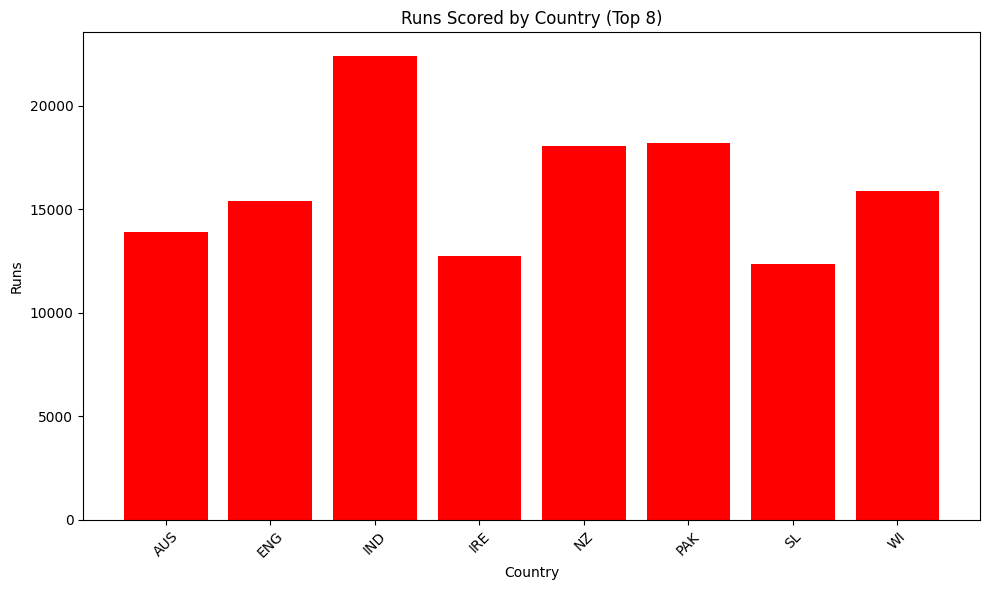

In [86]:
# Create a bar chart for Runs
plt.figure(figsize=(10, 6))
plt.bar(countrywise_stats['Country'], countrywise_stats['Runs'], color='red')
plt.xlabel('Country')
plt.ylabel('Runs')
plt.title('Runs Scored by Country (Top 8)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

Max Runs is scored by **India**

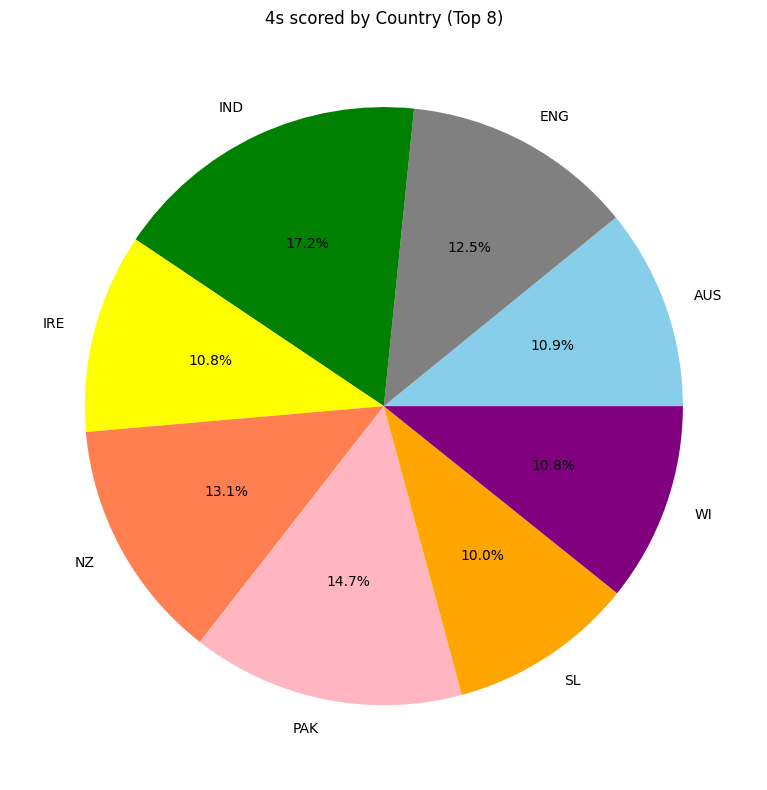

In [87]:
# Create a pie chart for Runs
plt.figure(figsize=(8, 8))
plt.pie(countrywise_stats['4s'], labels=countrywise_stats['Country'], autopct='%1.1f%%', colors=['skyblue', 'grey', 'green', 'yellow', 'coral', 'lightpink', 'orange', 'purple'])
plt.title('4s scored by Country (Top 8)')

# Show the plot
plt.tight_layout()
plt.show()


Max 4s hit by **INDIA**

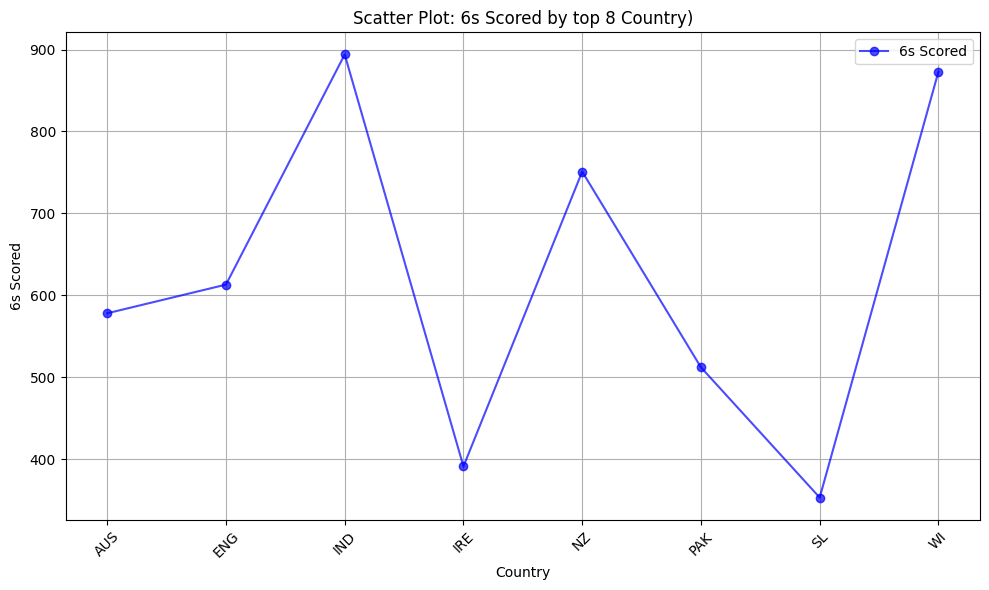

In [88]:
# Extract data from the DataFrame
sixes = countrywise_stats['6s']
countries = countrywise_stats['Country']

# Create a scatter plot for 6s scored by country with a line connecting the points
plt.figure(figsize=(10, 6))
plt.plot(countries, sixes, marker='o', linestyle='-', color='blue', label='6s Scored', alpha=0.7)

plt.xlabel('Country')
plt.ylabel('6s Scored')
plt.title('Scatter Plot: 6s Scored by top 8 Country)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Max 6s is hit by **India**

**There could be three reasons for India topped in each factors are :**
1.	The conditions of the pitches where India played their matches could favor batting and aggressive strokeplay.
2.	India have strong and agressive batters that consistently scores a high number of runs.
3.	 India may have batters who are exceptionally skilled at finding the gaps and hitting boundaries. This could result in a higher number of fours.


**Extracting the top player from each country on the basis that he has highest averge if a player has scored more than 1500 runs and played more than 70 innings**

In [89]:
# Define the criteria
innings_threshold = 70
runs_threshold = 1500

# Create an empty list to store DataFrames of top players
top_players_dataframes = []

# Loop through the top 8 countries
for country in top_8_countries:
    # Filter the DataFrame to include players from the current country
    country_df = top8countries_df[top8countries_df['Country'].str.contains(country)]

    # Filter players who meet the criteria
    filtered_df = country_df[(country_df['Inns'] > innings_threshold) & (country_df['Runs'] > runs_threshold)]

    # Sort the filtered DataFrame by batting average ('Ave') in descending order
    sorted_df = filtered_df.sort_values(by='Ave', ascending=False)

    # Select the top player (the player with the highest batting average)
    if not sorted_df.empty:
        top_player = sorted_df.iloc[0]
        top_players_dataframes.append(top_player)

# Concatenate the list of DataFrames into a single DataFrame
top_players_df = pd.concat(top_players_dataframes, axis=1).T

# Reset the index of the 'top_players_df'
top_players_df.reset_index(drop=True, inplace=True)

# Print the DataFrame containing the top players from each countrytop_players_df
top_players_df

,Player_Name,Country,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli,IND,2010-2022,115,107,31,4008,122,52.73,2905,137.96,1,37,4,356,117
1,Mohammad Rizwan,PAK,2015-2023,85,73,16,2797,104,49.07,2197,127.3,1,25,3,243,74
2,KS Williamson,NZ,2011-2022,87,85,11,2464,95,33.29,2003,123.01,0,17,4,230,57
3,CH Gayle,WI,2006-2021,79,75,7,1899,117,27.92,1381,137.5,2,14,4,158,124
4,JC Buttler,ENG,2011-2023,109,100,21,2766,101,35.01,1912,144.66,1,20,6,244,117
5,AJ Finch,AUS,2011-2022,103,103,12,3120,172,34.28,2189,142.53,2,19,8,309,125
6,PR Stirling,IRE,2009-2023,131,130,11,3408,115,28.63,2509,135.83,1,23,13,394,123
7,TM Dilshan,SL,2006-2016,80,79,12,1889,104,28.19,1567,120.54,1,13,10,223,33


In [102]:
# Calculate the mean of 'Runs' column
mean_runs = top_players_df['Runs'].mean()

# Calculate the mean of 'Ave' (Average) column
mean_average = top_players_df['Ave'].mean()

# Calculate the mean of 'SR' (Strike Rate) column
mean_strike_rate = top_players_df['SR'].mean()

# Print the means
print(f"Mean Runs: {mean_runs}")
print(f"Mean Average: {mean_average}")
print(f"Mean Strike Rate: {mean_strike_rate}")

Mean Runs: 2793.875
Mean Average: 36.14
Mean Strike Rate: 133.66625


**Findings and Inferences**|

**Comparing the Player on the basis of runs,average,4s,6s,Highest Score,Strike Rate**

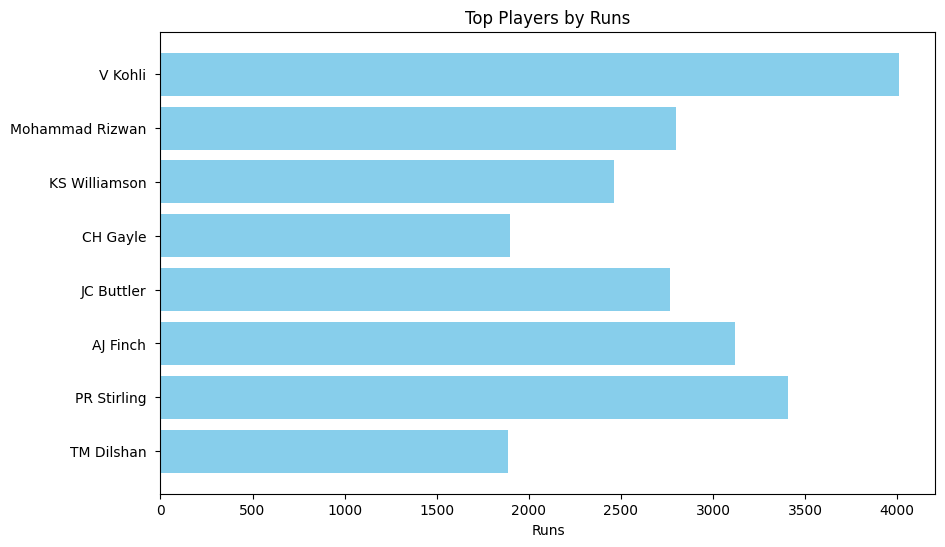

In [90]:
# Extract data for players and runs scored
runs_data = top_players_df['Runs']
players = top_players_df['Player_Name']

# Create a bar chart for runs
plt.figure(figsize=(10, 6))
plt.barh(players, runs_data, color='skyblue')
plt.xlabel('Runs')
plt.title('Top Players by Runs')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()


The most runs is scored by Virat Kohli(IND) And the second most is scored by PR stirling (IRE) among the top player from each country

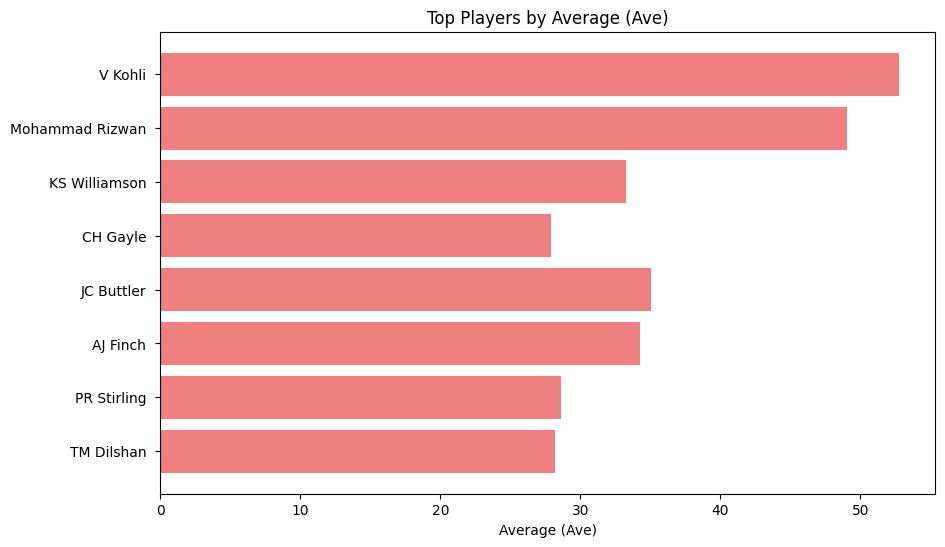

In [91]:
# Extract data for player and average
average_data = top_players_df['Ave']
# Create a bar chart for average
plt.figure(figsize=(10, 6))
plt.barh(players, average_data, color='lightcoral')
plt.xlabel('Average (Ave)')
plt.title('Top Players by Average (Ave)')
plt.gca().invert_yaxis()
plt.show()

Player with Highest average is  Virat Kohli and 2nd highest is Mohammad Rizwan among the top player from each country

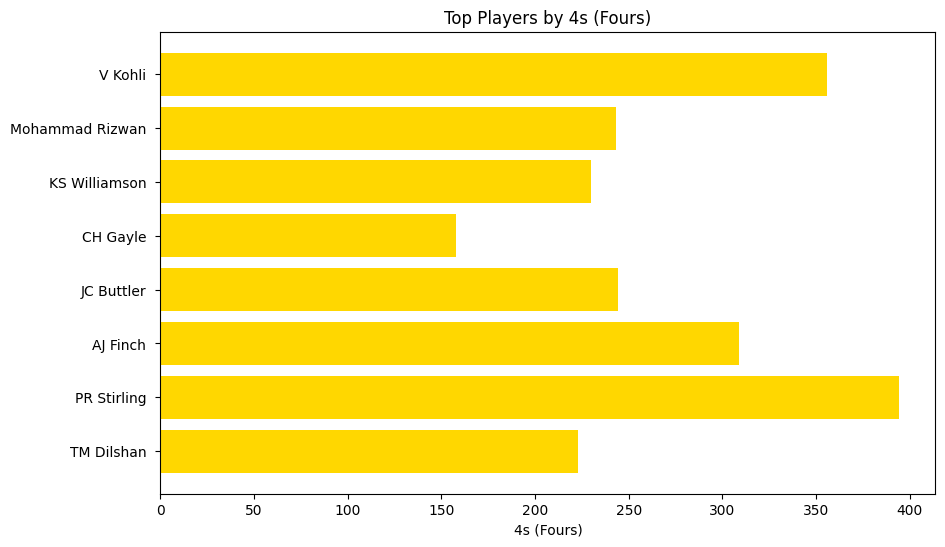

In [92]:
# Extract data for player names and 4s
fours_data = top_players_df['4s']

# Create a bar chart for 4s (fours)
plt.figure(figsize=(10, 6))
plt.barh(players, fours_data, color='gold')
plt.xlabel('4s (Fours)')
plt.title('Top Players by 4s (Fours)')
plt.gca().invert_yaxis()
plt.show()

Most 4s are scored by PR STIRLING And second most by Virat Kohli among the top player from each country

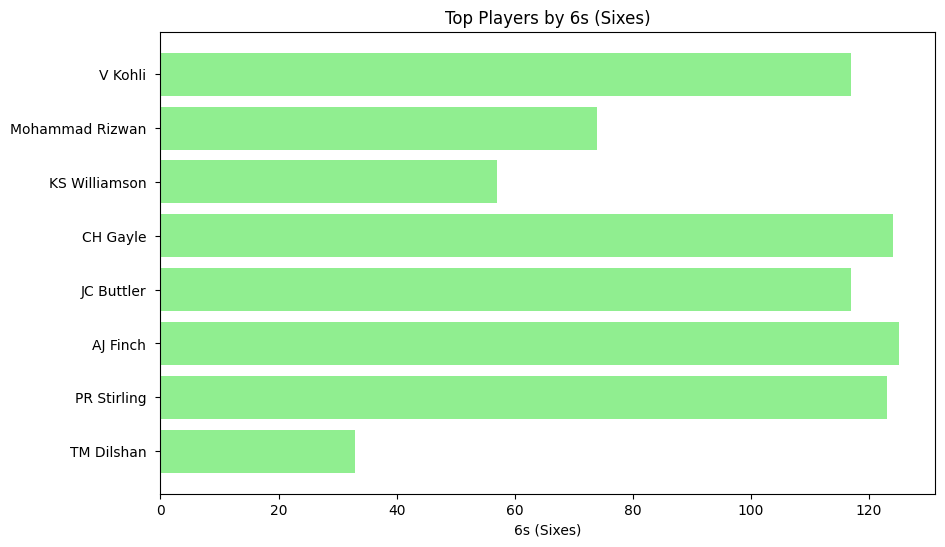

In [93]:
# Extract data for player and 6s
sixes_data = top_players_df['6s']
# Create a bar chart for 6s (sixes)
plt.figure(figsize=(10, 6))
plt.barh(players, sixes_data, color='lightgreen')
plt.xlabel('6s (Sixes)')
plt.title('Top Players by 6s (Sixes)')
plt.gca().invert_yaxis()
plt.show()

Most no. of 6s are hit by AJ Finch  and 2nd most 6s hit by CH Gayle among the top player from each country

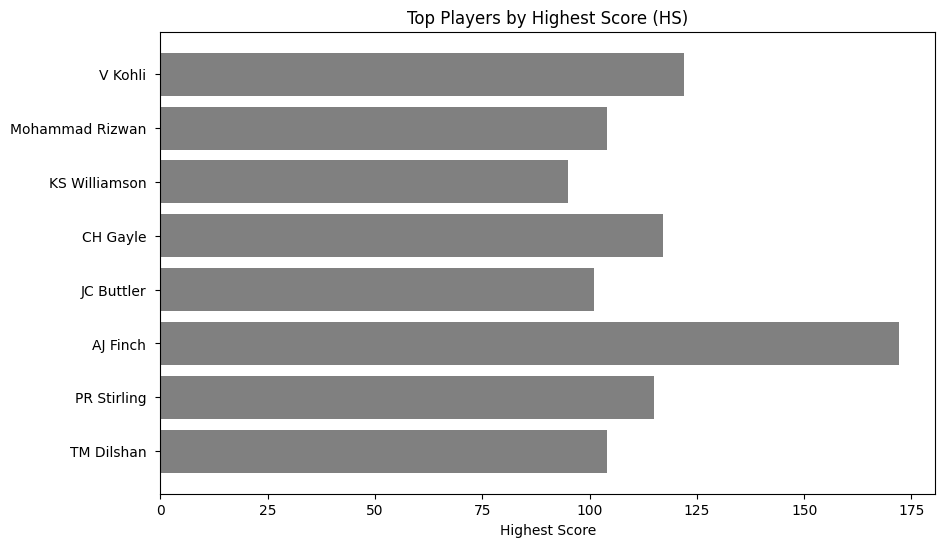

In [95]:
# Extract data for player and Highest Score
hs_data = top_players_df['HS']
# Create a bar chart for Highest Score (HS)
plt.figure(figsize=(10, 6))
plt.barh(players, hs_data, color='Grey')
plt.xlabel('Highest Score')
plt.title('Top Players by Highest Score (HS)')
plt.gca().invert_yaxis()
plt.show()

The highest score is made by AJ Finch which is 172

In [98]:
# Find the highest and second-highest scores
highest_score = top_players_df['HS'].max()
sorted_df = top_players_df.sort_values(by='HS', ascending=False)
second_highest_score = sorted_df.iloc[1]['HS']

# Calculate the difference
score_difference = highest_score - second_highest_score

print(f"Highest Score: {highest_score}")
print(f"Second Highest Score: {second_highest_score}")
print(f"Difference: {score_difference}")

Highest Score: 172
Second Highest Score: 122
Difference: 50


The highest score is made by AJ Finch which is 50 more compared to 2nd largest. This indicates a remarkable level of dominance and exceptional performance in that particular match.

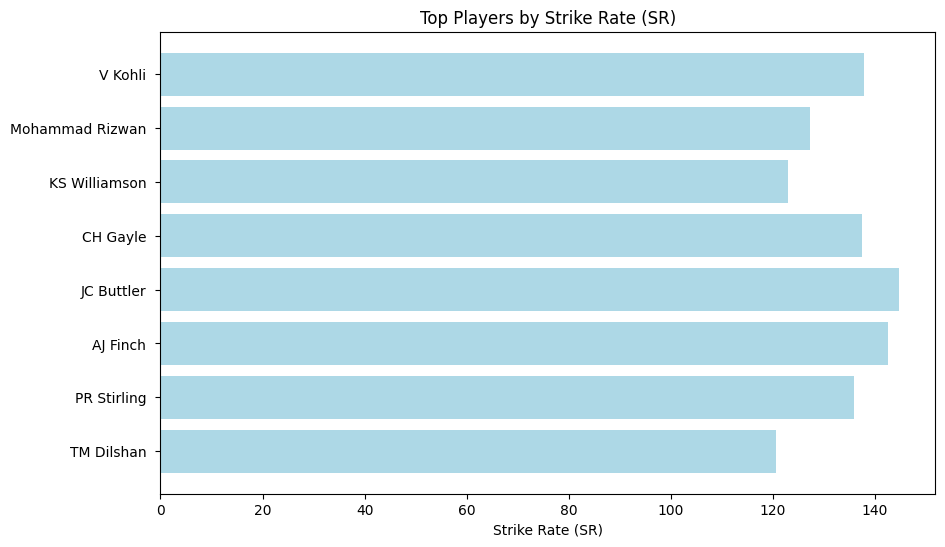

In [ ]:

# Extract data for player and Strike Rate
sr_data = top_players_df['SR']

# Create a bar chart for strike rate (SR)
plt.figure(figsize=(10, 6))
plt.barh(players, sr_data, color='lightblue')
plt.xlabel('Strike Rate (SR)')
plt.title('Top Players by Strike Rate (SR)')
plt.gca().invert_yaxis()
plt.show()

Players with Higher Strike :JC BUTTLER
Player with 2ND Highest strike rates : AJ FINCH
Player with Lower Strike rate : TM Dilshan among the top player from each country which indicate JC Buttler with intent most of the time

**WE CAN SAY VIRAT KOHLI IS THE BEST PLAYER BECAUSE IN MAXIMUM ASPECT, HE IS IN TOP 1 OR TOP 2.**

**Data of Indian Players out of the total players**

In [ ]:
# seperating indian players data from overall players data
# Filter Indian players
df_Indian_Players = cricket_df[cricket_df['Country'] == 'IND' ]
df_Indian_Players.reset_index(drop=True,inplace=True)
df_Indian_Players

,Player_Name,Country,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli,IND,2010-2022,115,107,31,4008,122,52.73,2905,137.96,1,37,4,356,117
1,RG Sharma,IND,2007-2022,148,140,17,3853,118,31.32,2767,139.24,4,29,10,348,182
2,KL Rahul,IND,2016-2022,72,68,8,2265,110,37.75,1628,139.12,2,22,5,191,99
3,SA Yadav,IND,2021-2023,53,50,10,1841,117,46.02,1066,172.70,3,15,3,166,104
4,S Dhawan,IND,2011-2021,68,66,3,1759,92,27.92,1392,126.36,0,11,2,191,50
5,MS Dhoni,IND,2006-2019,98,85,42,1617,56,37.60,1282,126.13,0,2,1,116,52
6,SK Raina,IND,2006-2018,78,66,11,1605,101,29.18,1190,134.87,1,5,3,145,58
7,HH Pandya,IND,2016-2023,92,71,18,1348,71,25.43,964,139.83,0,3,3,96,69
8,Yuvraj Singh,IND,2007-2017,58,51,9,1177,77,28.02,863,136.38,0,8,1,77,74
9,SS Iyer,IND,2017-2022,49,45,11,1043,74,30.67,767,135.98,0,7,4,85,42


**Getting Player with maximum Span**

In [ ]:
# Function to calculate span length
def calculate_span_length(span):
    start_year, end_year = map(int, span.split('-'))
    return end_year - start_year

# Find the player with the largest span
df_Indian_Players['Span Length'] = df_Indian_Players['Span'].apply(calculate_span_length)
largest_span_player = df_Indian_Players[df_Indian_Players['Span Length'] == df_Indian_Players['Span Length'].max()]

# Print the player with the largest span and their span length
if not largest_span_player.empty:
    max_span_player_name = largest_span_player.iloc[0]['Player_Name']
    max_span_length = largest_span_player.iloc[0]['Span Length']
    print(f"Player with the largest span: {max_span_player_name}")
    print(f"Largest span: {max_span_length} years")
else:
    print("No player found with the largest span.")


Player with the largest span: RG Sharma 
Largest span: 15 years


<ipython-input-31-0b8cfc204508>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Indian_Players['Span Length'] = df_Indian_Players['Span'].apply(calculate_span_length)


**Player with the largest span: RG Sharma**

**Largest span: 15 year**

In [ ]:
# Assuming you have the pandas library imported and your DataFrame is named df_Indian_Players

# Calculate the sum of total sixes and total fours
total_sixes = df_Indian_Players['6s'].sum()
total_fours = df_Indian_Players['4s'].sum()

print(f"Total Sixes: {total_sixes}")
print(f"Total Fours: {total_fours}")

Total Sixes: 894
Total Fours: 1966


**Total no. of 4s hit by these indian players are : 1966**
**Total no. of 4s hit by these indian players are : 894**:

In [ ]:
# Find the player with the highest Runs
highestruns = df_Indian_Players[df_Indian_Players['Runs'] == df_Indian_Players['Runs'].max()]

print("Player with the Highest Runs:")
highestruns

Player with the Highest Runs:


,Player_Name,Country,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Span Length
0,V Kohli,IND,2010-2022,115,107,31,4008,122,52.73,2905,137.96,1,37,4,356,117,12


In [ ]:
# Find the player with the highest Average
highestavg = df_Indian_Players[df_Indian_Players['Ave'] == df_Indian_Players['Ave'].max()]

print("Player with the Highest Average")
highestavg

Player with the Highest Average


,Player_Name,Country,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Span Length
0,V Kohli,IND,2010-2022,115,107,31,4008,122,52.73,2905,137.96,1,37,4,356,117,12


In [ ]:
# Find the player with the highest strike rate
highest_strike_rate_player = df_Indian_Players[df_Indian_Players['SR'] == df_Indian_Players['SR'].max()]

print("Player with the Highest Strike Rate:")
highest_strike_rate_player

Player with the Highest Strike Rate:


,Player_Name,Country,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Span Length
3,SA Yadav,IND,2021-2023,53,50,10,1841,117,46.02,1066,172.7,3,15,3,166,104,2


**Players with highest strike rate is : Suryakumar Yadav**

In [ ]:
# Find the player(s) with the maximum number of 50s
max_50s = df_Indian_Players['50'].max()
players_with_max_50s = df_Indian_Players[df_Indian_Players['50'] == max_50s]

print("Player(s) with the Maximum Number of 50s:")
players_with_max_50s

Player(s) with the Maximum Number of 50s:


,Player_Name,Country,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Span Length
0,V Kohli,IND,2010-2022,115,107,31,4008,122,52.73,2905,137.96,1,37,4,356,117,12


In [ ]:
# Find the player(s) with the maximum number of 100s
max_100s = df_Indian_Players['100'].max()
players_with_max_100s = df_Indian_Players[df_Indian_Players['100'] == max_100s]

print("Player(s) with the Maximum Number of 100s:")
players_with_max_100s

Player(s) with the Maximum Number of 100s:


,Player_Name,Country,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Span Length
1,RG Sharma,IND,2007-2022,148,140,17,3853,118,31.32,2767,139.24,4,29,10,348,182,15


In [ ]:
# Find the player(s) with the maximum number of times not out
max_not_outs = df_Indian_Players['NO'].max()
players_with_max_not_outs = df_Indian_Players[df_Indian_Players['NO'] == max_not_outs]

print("Player(s) with the Maximum Number of Times Not Out:")
players_with_max_not_outs


Player(s) with the Maximum Number of Times Not Out:


,Player_Name,Country,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Span Length
5,MS Dhoni,IND,2006-2019,98,85,42,1617,56,37.6,1282,126.13,0,2,1,116,52,13


In [ ]:
# Find the player(s) with the maximum number of dismissals (0s)
max_dismissals = df_Indian_Players['0'].max()
players_with_max_dismissals = df_Indian_Players[df_Indian_Players['0'] == max_dismissals]
print("Player(s) with the Maximum Number of Dismissals:")
print(players_with_max_dismissals)

Player(s) with the Maximum Number of Dismissals:
  Player_Name Country       Span  Mat  Inns  NO  Runs   HS    Ave    BF  \
1  RG Sharma      IND  2007-2022  148   140  17  3853  118  31.32  2767   

       SR  100  50   0   4s   6s  Span Length  
1  139.24    4  29  10  348  182           15  


In [ ]:
# Calculate the difference between innings and matches played for each player
df_Indian_Players['Difference'] = df_Indian_Players['Mat'] - df_Indian_Players['Inns']
# Sort the DataFrame by the 'Inns-Mat Difference' column in decreasing order
df_sorted = df_Indian_Players.sort_values(by='Difference', ascending=False)
# Print the sorted table with player names and differences
print(df_sorted[['Player_Name', 'Difference']])

      Player_Name  Difference
7      HH Pandya           21
5       MS Dhoni           13
6       SK Raina           12
10       RR Pant           10
0        V Kohli            8
1      RG Sharma            8
8   Yuvraj Singh            7
2       KL Rahul            4
9        SS Iyer            4
3       SA Yadav            3
4       S Dhawan            2
11     G Gambhir            1


<ipython-input-42-8ed972aa51f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Indian_Players['Difference'] = df_Indian_Players['Mat'] - df_Indian_Players['Inns']


If we consider only INDIAN players  Different player are good in different aspect :
For Example :
VIRAT KOHLI is the highest run getter and has maximum 50 and highest average which shows he is the consistent player.
SA YADAV is the player with highest Strike Rate which shows he is attacking player, He play with intent.
ROHIT SHARMA is the player with maximum no. of runs and most no. of dismissals, which shows when he plays good he goes on scoring very high, otherwise zero. We don’t have enough data to know how he got out and more. So we can say if he get the flow, he is a very good batsman, otherwise not.
MS Dhoni is the player who has maximum no. of not outs which shows he finish the game mostly and also he play less innings compared to other players. so we can say he come down the order and finishes the game most of time.

**Correlation table**

In [ ]:
# Select the columns you want to include in the correlation analysis
selected_columns = df_Indian_Players[['Runs', 'Ave', 'BF', 'SR', '100', '50', '4s', '6s','0']]

# Calculate the correlation matrix for the selected columns
correlation_matrix = selected_columns.corr()

# Print the correlation matrix
correlation_matrix

<ipython-input-44-8dcd3bffe939>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_columns.corr()


,Runs,Ave,SR,100,50,4s,6s,0
Runs,1.000000,0.633228,0.241277,0.666248,0.928118,0.979868,0.861339,0.691557
Ave,0.633228,1.000000,0.534065,0.423327,0.686135,0.592494,0.473446,0.112310
SR,0.241277,0.534065,1.000000,0.634120,0.299982,0.194817,0.523567,0.215509
100,0.666248,0.423327,0.634120,1.000000,0.645494,0.663392,0.858201,0.783329
50,0.928118,0.686135,0.299982,0.645494,1.000000,0.929376,0.789036,0.643524
4s,0.979868,0.592494,0.194817,0.663392,0.929376,1.000000,0.802929,0.690999
6s,0.861339,0.473446,0.523567,0.858201,0.789036,0.802929,1.000000,0.789137
0,0.691557,0.112310,0.215509,0.783329,0.643524,0.690999,0.789137,1.000000


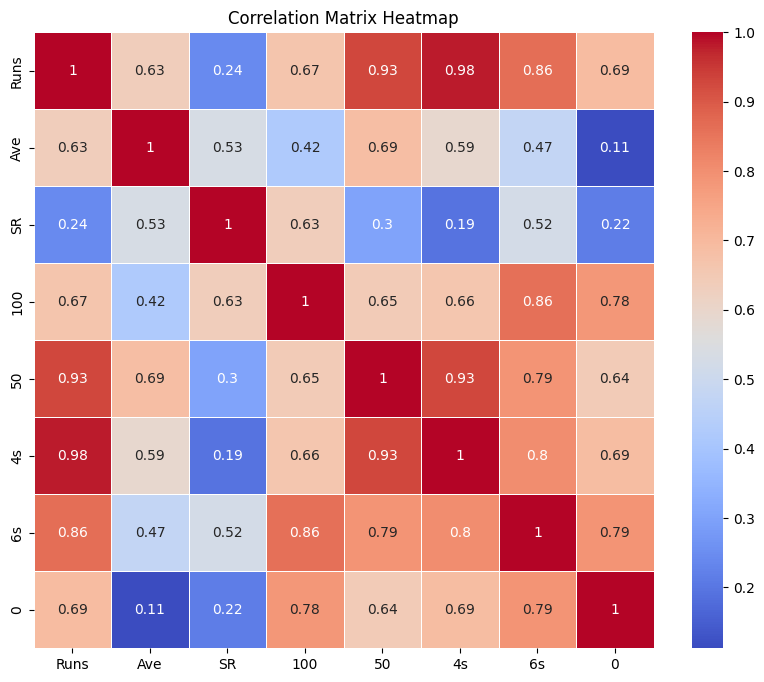

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Calculate the correlation and p-value for 'Runs' and 'Ave' columns
corr_runs_ave, p_value_runs_ave = pearsonr(df_Indian_Players['Runs'], df_Indian_Players['Ave'])
print(f"Correlation between 'Runs' and 'Ave': {corr_runs_ave:.2f}")
print(f"P-value: {p_value_runs_ave:.5f}")

Correlation between 'Runs' and 'Ave': 0.63
P-value: 0.02708


**Correlation between 'Runs' and 'Ave':**

The correlation coefficient(r-value) between 'Runs' and 'Ave' is 0.63.
This positive correlation suggests that as a player's batting average ('Ave') increases, their total runs ('Runs') tend to increase as well.
The p-value is 0.02708, which is less than the typical significance level of 0.05. This indicates that the correlation is statistically significant, suggesting a meaningful relationship between batting average and total runs.

In [ ]:
# Calculate the correlation and p-value for '6s' and 'Runs' columns
corr_6s_runs, p_value_6s_runs = pearsonr(df_Indian_Players['6s'], df_Indian_Players['Runs'])
print(f"Correlation between '6s' and 'Runs': {corr_6s_runs:.2f}")
print(f"P-value: {p_value_6s_runs:.5f}")

Correlation between '6s' and 'Runs': 0.86
P-value: 0.00032


**Correlation between '6s' and 'Runs':**

The correlation coefficient (r-value) between '6s' (sixes hit) and 'Runs' is 0.86.
This strong positive correlation suggests that as a player scores more runs, they tend to hit more sixes.
The p-value is 0.00032, which is much less than 0.05. This indicates that the correlation is highly statistically significant, confirming a strong relationship between the number of sixes and total runs.

In [ ]:
# Calculate the correlation and p-value for 'SR' and 'Runs' columns
corr_s_runs, p_value_s_runs = pearsonr(df_Indian_Players['SR'], df_Indian_Players['Runs'])
print(f"Correlation between 'SR' and 'Runs': {corr_s_runs:.2f}")
print(f"P-value: {p_value_s_runs:.5f}")

Correlation between 'SR' and 'Runs': 0.24
P-value: 0.44997


**Correlation between 'SR' and 'Runs':**

The correlation coefficient (r-value) between 'SR' (strike rate) and 'Runs' is 0.24.
This positive correlation suggests that there is a weak relationship between a player's strike rate and their total runs.
The p-value is 0.44997, which is greater than 0.05. This indicates that the correlation is not statistically significant, suggesting that the relationship between strike rate and total runs may not be meaningful.

**By this we can conclude that if you hit more 4s and more 6s , your runs increases. But if a player play with good strike chances of making more run is low. The reason could be more risk is assosciated with in playing with good strike rate**

**MANAGERIAL INSIGHTS**

•	Identify players with a high number of 50s (half-centuries) as they consistently contribute with substantial runs. These players can be reliable middle-order batsmen.

•	Focus on players who have hit a significant number of 4s and 6s, as they can provide quick runs and keep the scoreboard ticking as there is a positive correlations between runs and 4s and runs and 6s. These players are valuable in T20 cricket.

•	According to p-value and r-value Runs and strike rate are weakly related. But In T20 cricket Strike Rate and Runs both are very important. So, choose a player who is a need to focus on both factors simultaneously.

•	Identify players who have strike rate between, because some of the stars players of different countries have strike rate above 140 like JC Buttler and A Finch

•	Identify Players who has average above 36.14, and strike rate above 136.66 as this is the mean of top players of top 8 countries.

•	A correlation coefficient of 0.78 between no. of dismissals and maximum no. of 100 shows a relatively strong positive relationship so if an individual have max dismissals on 0 .then also he can win matches when he is in form.

•	Players with a high number of not outs may have the ability to finish innings effectively and ensure that their team reaches a competitive total.
